<a href="https://colab.research.google.com/github/mayanksreal/marks-evaluation/blob/main/table-extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:
# Load the image
image = cv2.imread('page-demo.png')

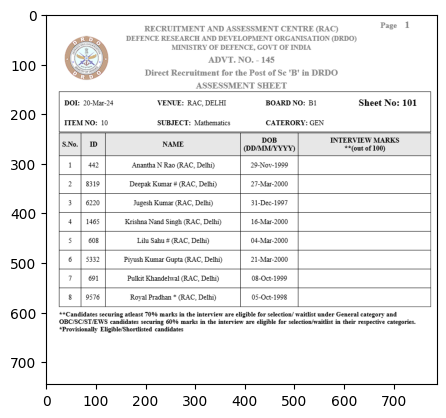

In [13]:
plt.imshow(image)

In [7]:
#greyscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [10]:
edges = cv2.Canny(blurred, 50, 150)

In [12]:
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
# Sort contours by area
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

In [15]:
# Iterate through contours and find the contour that corresponds to the table
table_contour = None
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

    if len(approx) == 4:
        table_contour = approx
        break

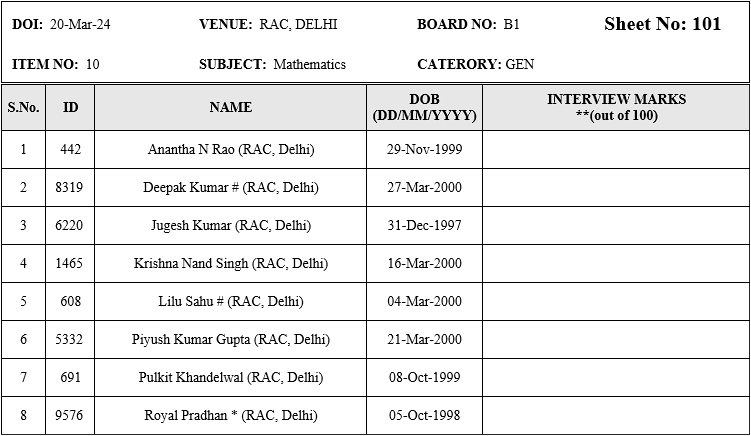

In [16]:
# Extract the table region and display it
if table_contour is not None:
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(table_contour)

    # Crop the table region from the original image
    table_image = image[y:y+h, x:x+w]

    # Display the cropped table image
    cv2_imshow(table_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Table contour not found")

sample

In [18]:
import os
import cv2
import numpy as np

image = cv2.imread('table.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]
x, y, w, h = cv2.boundingRect(contours[0])
row1_height = 77  # Height of the first row
other_rows_height = 64  # Height of other rows
column_widths = [73, 82, 459, 195, 430]  # Experimentally determined column widths
rows = 9
cols = len(column_widths)
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for r in range(rows):
    if r == 0:
        row_height = row1_height
    else:
        row_height = other_rows_height
    row_dir = os.path.join(output_dir, f'row_{r}')
    if not os.path.exists(row_dir):
        os.makedirs(row_dir)

    for c in range(cols):
        cell_x = x + sum(column_widths[:c])  # Calculate x-coordinate based on cumulative column widths
        cell_y = y + sum([row1_height if i == 0 else other_rows_height for i in range(r)])  # Calculate y-coordinate based on cumulative row heights
        cell = image[cell_y:cell_y + row_height, cell_x:cell_x + column_widths[c]]
        cv2.imwrite(os.path.join(row_dir, f'cell_{c}.png'), cell)

print("Cells extracted and saved successfully.")


Cells extracted and saved successfully.
